In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

In [10]:
def arctic_ocean_mask(region='rims'):
    
    import xarray as xr
    import os
    
    mdiri = "/home/apbarret/projects/ancillary/masks"
    mfili = "arctic_mask_cfsr.nc"
    
    ds = xr.open_dataset(os.path.join(mdiri, mfili))
    
    if (region == "rims"):
        return ds['arctic_mask'].where(ds['arctic_mask'] == 6)*0. + 1.
    elif (region == "drew arctic"):
        return ds['arctic_mask'].where((ds['arctic_mask'] == 6) | 
                                       ((ds['lat'] > 66.5) & 
                                        (ds['lon'] > 180) & (ds['lon'] < 310.) &
                                        (ds['arctic_mask'] == 0)))*0. + 1.
    elif (region == "Nof80"):
        return ds['arctic_mask'].where(ds['lat'] > 80.)
    else:
        print ("arctic_ocean_mask: Unknown region")
        return None


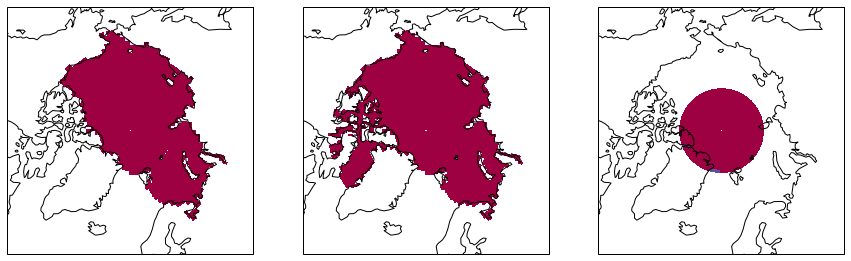

In [11]:
fig = plt.figure(figsize(15,7))

rims_mask = arctic_ocean_mask(region='rims')
drew_mask = arctic_ocean_mask(region='drew arctic')
nof80_mask = arctic_ocean_mask(region='Nof80')

img_proj = ccrs.PlateCarree()
img_extent = (-180.,180.,-90.,90.)

ax1 = plt.subplot(1,3,1, projection=ccrs.Orthographic(0.,90))
ax1.set_extent([-180.,180.,60.,90.], ccrs.PlateCarree())
ax1.coastlines(zorder=3)

ax2 = plt.subplot(1,3,2, projection=ccrs.Orthographic(0.,90))
ax2.set_extent([-180.,180.,60.,90.], ccrs.PlateCarree())
ax2.coastlines(zorder=3)

ax3 = plt.subplot(1,3,3, projection=ccrs.Orthographic(0.,90))
ax3.set_extent([-180.,180.,60.,90.], ccrs.PlateCarree())
ax3.coastlines(zorder=3)

rims_mask.plot(ax=ax1, vmin=0., vmax=1., add_colorbar=False, cmap='Spectral_r', transform=img_proj)
drew_mask.plot(ax=ax2, vmin=0., vmax=1., add_colorbar=False, cmap='Spectral_r', transform=img_proj)
nof80_mask.plot(ax=ax3, vmin=0., vmax=1., add_colorbar=False, cmap='Spectral_r', transform=img_proj)



0.9.5
<xarray.DataArray ()>
array(-1.2168148007982928e-11)
<xarray.DataArray ()>
array(0.00012203147200795042)
<xarray.DataArray ()>
array(0.9999999999999863)


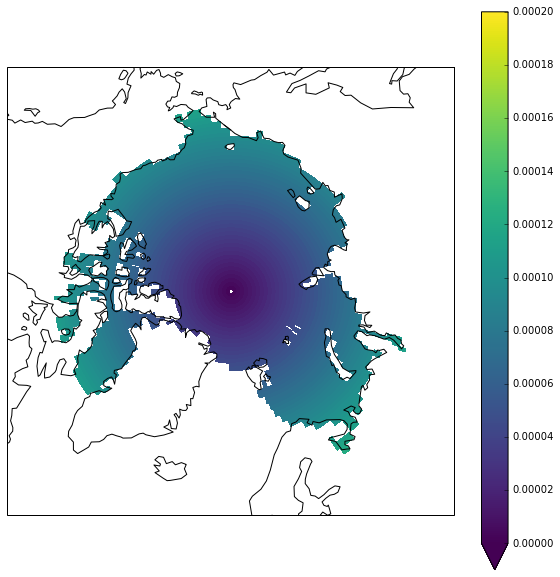

In [41]:
import xarray as xr
import numpy as np

print xr.__version__
mask = arctic_ocean_mask(region='drew arctic')

latweight = np.cos(mask['lat'] * np.pi/180.)
lonweight = xr.DataArray(np.ones(mask['lon'].size), [mask.coords['lon']])
                         
weight = latweight * lonweight * mask
weight = weight / weight.sum()
#weight.where(weight < 0., 0.)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0.,90.))
ax.set_extent([-180.,180.,60.,90.], ccrs.PlateCarree())
ax.coastlines(zorder=3)

weight.plot(ax=ax, vmin=0, vmax=0.0002, transform=img_proj)

print weight.min()
print weight.max()
print weight.sum()